This notebook works with a stacked person-trip dataset (across all modeled scenarios), and produces the following summaries: 1. INEXUS, 2. Destination change (overall and by income segment), 3. Travel time change (overall and by income segment) and 4. Consumer surplus. Note that revenues are calculated separately as one has to identify both the trips that end in the cordon and also those that go through the cordon but do not end there.

In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences

In [2]:
%%time
sf_stacked_cordon = pd.read_csv('sf_2020_stacked_cordonpricing_20241105.csv', compression='gzip')

<timed exec>:1: DtypeWarning: Columns (97,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,159,164,166,167,168,169,171,172,229,230,231,232,241) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 2min 20s, sys: 31.2 s, total: 2min 51s
Wall time: 3min 26s


# Filter trips

In [3]:
# Block groups
cordon_zones = ['060750615006',
'060750615005',
'060750615004',
'060750615003',
'060750615002',
'060750615001',
'060750611003',
'060750611002',
'060750611001',
'060750607003',
'060750607002',
'060750607001',
'060750202001',
'060750201004',
'060750201003',
'060750201002',
'060750201001',
'060750180002',
'060750180001',
'060750178022',
'060750178021',
'060750178012',
'060750178011',
'060750177002',
'060750177001',
'060750176015',
'060750176014',
'060750176013',
'060750176012',
'060750176011',
'060750168023',
'060750168021',
'060750162003',
'060750162002',
'060750162001',
'060750125022',
'060750125021',
'060750125012',
'060750125011',
'060750124023',
'060750124022',
'060750124021',
'060750124012',
'060750124011',
'060750123022',
'060750123021',
'060750123012',
'060750123011',
'060750122021',
'060750122012',
'060750122011',
'060750121002',
'060750121001',
'060750120002',
'060750120001',
'060750119022',
'060750119021',
'060750119012',
'060750119011',
'060750118001',
'060750117002',
'060750117001',
'060750113002',
'060750113001',
'060750112003',
'060750112002',
'060750112001',
'060750111003',
'060750111002',
'060750111001',
'060750110003',
'060750110002',
'060750110001',
'060750109003',
'060750109002',
'060750109001',
'060750108003',
'060750108002',
'060750108001',
'060750107004',
'060750107003',
'060750107002',
'060750107001',
'060750106003',
'060750106002',
'060750106001',
'060750105002',
'060750105001',
'060750104004',
'060750104003',
'060750104002',
'060750104001',
'060750103003',
'060750103002',
'060750103001',
'060750102003',
'060750102002',
'060750102001',
'060750101002',
'060750101001']

SF_zones = ['060750101001',
'060750101002',
'060750102001',
'060750102002',
'060750102003',
'060750103001',
'060750103002',
'060750103003',
'060750104001',
'060750104002',
'060750104003',
'060750104004',
'060750105001',
'060750105002',
'060750106001',
'060750106002',
'060750106003',
'060750107001',
'060750107002',
'060750107003',
'060750107004',
'060750108001',
'060750108002',
'060750108003',
'060750109001',
'060750109002',
'060750109003',
'060750110001',
'060750110002',
'060750110003',
'060750111001',
'060750111002',
'060750111003',
'060750112001',
'060750112002',
'060750112003',
'060750113001',
'060750113002',
'060750117001',
'060750117002',
'060750118001',
'060750119011',
'060750119012',
'060750119021',
'060750119022',
'060750120001',
'060750120002',
'060750121001',
'060750121002',
'060750122011',
'060750122012',
'060750122021',
'060750123011',
'060750123012',
'060750123021',
'060750123022',
'060750124011',
'060750124012',
'060750124021',
'060750124022',
'060750124023',
'060750125011',
'060750125012',
'060750125021',
'060750125022',
'060750126011',
'060750126021',
'060750126022',
'060750127001',
'060750127002',
'060750127003',
'060750128001',
'060750128002',
'060750128003',
'060750128004',
'060750129011',
'060750129012',
'060750129021',
'060750129022',
'060750129023',
'060750130001',
'060750130002',
'060750130003',
'060750130004',
'060750131011',
'060750131012',
'060750131021',
'060750131022',
'060750132001',
'060750132002',
'060750132003',
'060750133001',
'060750133002',
'060750133003',
'060750133004',
'060750133005',
'060750134001',
'060750134002',
'060750134003',
'060750135001',
'060750135002',
'060750151001',
'060750151002',
'060750152001',
'060750152002',
'060750152003',
'060750153001',
'060750153002',
'060750154001',
'060750154002',
'060750154003',
'060750154004',
'060750154005',
'060750155001',
'060750155002',
'060750155003',
'060750156001',
'060750156002',
'060750156003',
'060750157001',
'060750157002',
'060750157003',
'060750157004',
'060750158011',
'060750158012',
'060750158013',
'060750158021',
'060750158022',
'060750159001',
'060750159002',
'060750160001',
'060750161001',
'060750161002',
'060750161003',
'060750161004',
'060750162001',
'060750162002',
'060750162003',
'060750163001',
'060750163002',
'060750163003',
'060750164001',
'060750164002',
'060750165001',
'060750165002',
'060750165003',
'060750165004',
'060750166001',
'060750166002',
'060750166003',
'060750166004',
'060750167001',
'060750167002',
'060750167003',
'060750167004',
'060750168011',
'060750168012',
'060750168013',
'060750168021',
'060750168022',
'060750168023',
'060750169001',
'060750169002',
'060750170001',
'060750170002',
'060750170003',
'060750171011',
'060750171012',
'060750171013',
'060750171021',
'060750171022',
'060750171023',
'060750176011',
'060750176012',
'060750176013',
'060750176014',
'060750176015',
'060750177001',
'060750177002',
'060750178011',
'060750178012',
'060750178021',
'060750178022',
'060750180001',
'060750180002',
'060750201001',
'060750201002',
'060750201003',
'060750201004',
'060750202001',
'060750202002',
'060750202003',
'060750203001',
'060750203002',
'060750203003',
'060750204011',
'060750204012',
'060750204013',
'060750204021',
'060750204022',
'060750205001',
'060750205002',
'060750205003',
'060750206001',
'060750206002',
'060750206003',
'060750206004',
'060750207001',
'060750207002',
'060750207003',
'060750208001',
'060750208002',
'060750208003',
'060750208004',
'060750209001',
'060750209002',
'060750209003',
'060750209004',
'060750210001',
'060750210002',
'060750210003',
'060750210004',
'060750211001',
'060750211002',
'060750211003',
'060750211004',
'060750212001',
'060750212002',
'060750212003',
'060750213001',
'060750213002',
'060750214001',
'060750214002',
'060750214003',
'060750215001',
'060750215002',
'060750215003',
'060750215004',
'060750215005',
'060750216001',
'060750216002',
'060750217001',
'060750217002',
'060750217003',
'060750218001',
'060750218002',
'060750218003',
'060750218004',
'060750226001',
'060750226002',
'060750227021',
'060750227022',
'060750227041',
'060750227042',
'060750228011',
'060750228012',
'060750228013',
'060750228021',
'060750228022',
'060750228031',
'060750228032',
'060750228033',
'060750229011',
'060750229012',
'060750229013',
'060750229021',
'060750229022',
'060750229031',
'060750229032',
'060750229033',
'060750230011',
'060750230012',
'060750230013',
'060750230031',
'060750230032',
'060750231021',
'060750231022',
'060750231031',
'060750231032',
'060750232001',
'060750232002',
'060750232003',
'060750233001',
'060750234001',
'060750234002',
'060750251001',
'060750251002',
'060750251003',
'060750252001',
'060750252002',
'060750252003',
'060750252004',
'060750253001',
'060750253002',
'060750253003',
'060750253004',
'060750254011',
'060750254012',
'060750254013',
'060750254021',
'060750254022',
'060750254023',
'060750254031',
'060750254032',
'060750255001',
'060750255002',
'060750255003',
'060750255004',
'060750255005',
'060750255006',
'060750256001',
'060750256002',
'060750256003',
'060750256004',
'060750257011',
'060750257012',
'060750257013',
'060750257021',
'060750257022',
'060750257023',
'060750258001',
'060750258002',
'060750259001',
'060750259002',
'060750259003',
'060750260011',
'060750260012',
'060750260021',
'060750260022',
'060750260031',
'060750260032',
'060750260041',
'060750260042',
'060750261001',
'060750261002',
'060750261003',
'060750261004',
'060750262001',
'060750262002',
'060750262003',
'060750262004',
'060750262005',
'060750263011',
'060750263012',
'060750263013',
'060750263021',
'060750263022',
'060750263023',
'060750263031',
'060750263032',
'060750264011',
'060750264012',
'060750264021',
'060750264022',
'060750264023',
'060750264031',
'060750264032',
'060750264041',
'060750264042',
'060750301011',
'060750301012',
'060750301013',
'060750301014',
'060750301021',
'060750301022',
'060750301023',
'060750302011',
'060750302012',
'060750302013',
'060750302021',
'060750302022',
'060750302023',
'060750303011',
'060750303012',
'060750303013',
'060750303014',
'060750303021',
'060750303022',
'060750303023',
'060750304001',
'060750304002',
'060750304003',
'060750304004',
'060750304005',
'060750305001',
'060750305002',
'060750305003',
'060750306001',
'060750306002',
'060750306003',
'060750307001',
'060750307002',
'060750307003',
'060750308001',
'060750308002',
'060750308003',
'060750308004',
'060750308005',
'060750309001',
'060750309002',
'060750309003',
'060750309004',
'060750309005',
'060750309006',
'060750309007',
'060750310001',
'060750310002',
'060750310003',
'060750311001',
'060750311002',
'060750311003',
'060750311004',
'060750311005',
'060750312011',
'060750312012',
'060750312013',
'060750312014',
'060750312021',
'060750312022',
'060750313011',
'060750313012',
'060750313013',
'060750313021',
'060750313022',
'060750313023',
'060750314001',
'060750314002',
'060750314003',
'060750314004',
'060750314005',
'060750326011',
'060750326012',
'060750326013',
'060750326021',
'060750326022',
'060750326023',
'060750327001',
'060750327002',
'060750327003',
'060750327004',
'060750327005',
'060750327006',
'060750327007',
'060750328011',
'060750328012',
'060750328013',
'060750328021',
'060750328022',
'060750328023',
'060750329011',
'060750329012',
'060750329013',
'060750329014',
'060750329021',
'060750329022',
'060750329023',
'060750330001',
'060750330002',
'060750330003',
'060750330004',
'060750330005',
'060750330006',
'060750331001',
'060750331002',
'060750331003',
'060750331004',
'060750332011',
'060750332031',
'060750332032',
'060750332041',
'060750332042',
'060750332043',
'060750351001',
'060750351002',
'060750351003',
'060750351004',
'060750351005',
'060750351006',
'060750351007',
'060750352011',
'060750352012',
'060750352013',
'060750352014',
'060750352015',
'060750352021',
'060750352022',
'060750352023',
'060750353001',
'060750353002',
'060750353003',
'060750353004',
'060750353005',
'060750353006',
'060750354001',
'060750354002',
'060750354003',
'060750354004',
'060750354005',
'060750401001',
'060750401002',
'060750401003',
'060750401004',
'060750402001',
'060750402002',
'060750402003',
'060750402004',
'060750426011',
'060750426012',
'060750426021',
'060750426022',
'060750426023',
'060750427001',
'060750427002',
'060750427003',
'060750428001',
'060750428002',
'060750428003',
'060750451001',
'060750451002',
'060750451003',
'060750452001',
'060750452002',
'060750452003',
'060750452004',
'060750452005',
'060750476001',
'060750476002',
'060750476003',
'060750476004',
'060750477011',
'060750477012',
'060750477013',
'060750477021',
'060750477022',
'060750477023',
'060750478011',
'060750478012',
'060750478013',
'060750478021',
'060750478022',
'060750478023',
'060750479011',
'060750479012',
'060750479013',
'060750479014',
'060750479015',
'060750479021',
'060750479022',
'060750479023',
'060750601001',
'060750604001',
'060750605021',
'060750605022',
'060750605023',
'060750607001',
'060750607002',
'060750607003',
'060750610001',
'060750610002',
'060750611001',
'060750611002',
'060750611003',
'060750612001',
'060750612002',
'060750614001',
'060750614002',
'060750614003',
'060750615001',
'060750615002',
'060750615003',
'060750615004',
'060750615005',
'060750615006',
'060759802001',
'060759803001',
'060759805011',
'060759806001',
'060759809001',
'060816004012',
'060816007001']

In [4]:
def preprocess_data(df):
    """Preprocess the stacked data file."""
    
    # Make a copy and process block groups format
    for col in ['BlockGroupStart', 'BlockGroupEnd']:
        df[f'{col}_copy'] = df[col].astype(str).str[:-2].str.zfill(12)
    
    # Filter for cordon zones
    df = df[
        df['BlockGroupStart_copy'].isin(cordon_zones) | 
        df['BlockGroupEnd_copy'].isin(cordon_zones)
    ]
    
    return df

In [5]:
df = preprocess_data(sf_stacked_cordon)

In [6]:
len(df)

557383

# Process income data

In [7]:
def process_income_data(dataframe):
    # Select relevant columns
    small_stacked_rh_price = dataframe[['toll','income_deciles','IDMerged','tripIndex',
                                      'income', 
                                      'Realized_INEXUS_in_dollar_2023', 'potential_in_dollar_2023_relative_to_baseline',
                                      'realized_in_dollar_2023_relative_to_baseline',
                                      'Potential_INEXUS_in_dollar_2023', 'mode_choice_actual_4', 'duration_door_to_door',
                                      'waitTime_no_replanning','waitTime_replanning', 'mode_choice_planned_BEAM',
                                      'mode_choice_actual_BEAM']]
    
    # Convert income to thousands
    small_stacked_rh_price['incomeInThousands'] = small_stacked_rh_price['income'] / 1000
    
    # Get unique income per person
    person_income = pd.pivot_table(
        small_stacked_rh_price,
        index=['IDMerged'],
        aggfunc={'incomeInThousands': 'first'}).reset_index()
    
    # Create decile ranks using qcut
    person_income['incomeRank'] = pd.qcut(person_income['incomeInThousands'], 
                                         q=10, 
                                         labels=False)
    
    # Merge ranks back to original data
    smaller_stacked_rh_price = pd.merge(
        left=small_stacked_rh_price, 
        right=person_income[['IDMerged', 'incomeRank']], 
        how='left', 
        on=['IDMerged']
    )
    
    # Create summary statistics
    lorenz_data = pd.pivot_table(
        smaller_stacked_rh_price,
        index=['toll', 'incomeRank'],
        aggfunc={
            'incomeInThousands': np.mean,
            'Potential_INEXUS_in_dollar_2023': np.mean,
            'Realized_INEXUS_in_dollar_2023': np.mean,
            'realized_in_dollar_2023_relative_to_baseline': np.mean,
            'potential_in_dollar_2023_relative_to_baseline': np.mean
        }).reset_index()
    
    return lorenz_data

# Calculate the Realized INEXUS 

In [8]:
def map_beam_activitysim_modes(dataframe):
   conditions = [
       (dataframe['mode_choice_actual_BEAM'] == 'walk')&(dataframe['trip_mode_AS_trips'] == 'WALK'),
       (dataframe['mode_choice_actual_BEAM'] == 'bike')&(dataframe['trip_mode_AS_trips'] == 'BIKE'),
       (dataframe['mode_choice_actual_BEAM'].isin(['hov3_teleportation', 'car_hov3']))&
       (dataframe['trip_mode_AS_trips'].isin(['SHARED3FREE', 'SHARED3PAY'])),
       (dataframe['mode_choice_actual_BEAM'].isin(['hov2_teleportation', 'car_hov2']))&
       (dataframe['trip_mode_AS_trips'].isin(['SHARED2FREE', 'SHARED2PAY'])),
       (dataframe['mode_choice_actual_BEAM'] == 'car')&
       (dataframe['trip_mode_AS_trips'].isin(['DRIVEALONEFREE', 'DRIVEALONEPAY'])),
       (dataframe['mode_choice_actual_BEAM'] == 'walk_transit')&
       (dataframe['trip_mode_AS_trips'].isin(['WALK_LRF', 'WALK_LOC', 'WALK_EXP', 'WALK_HVY', 'WALK_COM'])),
       (dataframe['mode_choice_actual_BEAM'].isin(['ride_hail', 'ride_hail_pooled']))&
       (dataframe['trip_mode_AS_trips'].isin(['TNC_SINGLE', 'TNC_SHARED', 'TAXI'])),
       (dataframe['mode_choice_actual_BEAM'] == 'drive_transit')&
       (dataframe['trip_mode_AS_trips'].isin(['DRIVE_COM', 'DRIVE_LRF', 'DRIVE_LOC', 'DRIVE_EXP', 'DRIVE_HVY']))
   ]

   choices = [
       dataframe['WALK'],
       dataframe['BIKE'],
       dataframe[['SHARED3FREE', 'SHARED3PAY']].max(axis=1),
       dataframe[['SHARED2FREE', 'SHARED2PAY']].max(axis=1),
       dataframe[['DRIVEALONEFREE', 'DRIVEALONEPAY']].max(axis=1),
       dataframe[['WALK_LRF', 'WALK_LOC', 'WALK_EXP', 'WALK_HVY', 'WALK_COM']].max(axis=1),
       dataframe[['TNC_SINGLE', 'TNC_SHARED', 'TAXI']].max(axis=1),
       dataframe[['DRIVE_COM', 'DRIVE_LRF', 'DRIVE_LOC', 'DRIVE_EXP', 'DRIVE_HVY']].max(axis=1)
   ]

   dataframe['Realized_INEXUS'] = np.select(conditions, choices, default=np.nan)

   auto_cols = ['DRIVEALONEFREE', 'DRIVEALONEPAY', 'SHARED2FREE', 'SHARED3FREE', 'SHARED2PAY', 'SHARED3PAY', 
               'DRIVE_LOC', 'DRIVE_LRF', 'DRIVE_EXP', 'DRIVE_HVY', 'DRIVE_COM']
   walk_cols = ['WALK', 'WALK_LOC', 'WALK_LRF', 'WALK_EXP', 'WALK_HVY', 'WALK_COM'] 

   auto_modes = ['car_hov2', 'car_hov3', 'hov2_teleportation', 'hov3_teleportation', 'car', 'drive_transit']
   walk_modes = ['walk', 'walk_transit']

   dataframe['Realized_INEXUS'] = np.where(
       (dataframe['Realized_INEXUS'].isna()) & (dataframe['mode_choice_actual_BEAM'].isin(auto_modes)),
       dataframe[auto_cols].max(axis=1),
       dataframe['Realized_INEXUS']
   )

   dataframe['Realized_INEXUS'] = np.where(
       (dataframe['Realized_INEXUS'].isna()) & (dataframe['mode_choice_actual_BEAM'].isin(walk_modes)),
       dataframe[walk_cols].max(axis=1),
       dataframe['Realized_INEXUS']
   )

   dataframe['Realized_INEXUS'] = np.where(
       dataframe['Realized_INEXUS'].isna() & (dataframe['mode_choice_actual_BEAM'] == 'bike'),
       dataframe[['BIKE', 'WALK'] + walk_cols].max(axis=1),
       dataframe['Realized_INEXUS']
   )

   dataframe.dropna(subset=['Realized_INEXUS'], inplace=True)
   
   return dataframe

In [9]:
df = map_beam_activitysim_modes(df)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2303628703.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Realized_INEXUS'] = np.select(conditions, choices, default=np.nan)
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2303628703.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Realized_INEXUS'] = np.where(
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2303628703.py:45: SettingWithCopyWarning: 
A value is trying to be set on a 

# Convert the INEXUS values to dollar 

Figure out alpha for each person-trip:

a. ALPHA = 0.6(c_ivt /valueOfTime(n)) = c_cost
    
b. c_ivt = different for each trip purpose:<br>

Expression c_ivt<br>
work -0.022<br>
univ -0.0271<br>
school -0.0271<br>
escort -0.0279<br>
shopping -0.0279<br>
eatout -0.0279<br>
othmaint -0.0175<br>
social -0.0175<br>
othdiscr -0.0279<br>
atwork -0.0279<br>

c. Value of time for each person is in hh in ActivitySim
2. For each scenario separately 
3. Utility of the actual mode taken (Realized inexus)
4. Multiply that by 1/alpha
5. That will be the monetized_realized for each person-trip which is the same as Willingness to pay (WTP)

In [10]:
# Function to calculate c_ivt based on primary_purpose
def calculate_in_vehicle_time_coefficient(primary_purpose):
    conditions = [
        (primary_purpose == 'work'),
        (primary_purpose == 'univ'),
        (primary_purpose == 'school'),
        (primary_purpose == 'escort'),
        (primary_purpose == 'shopping'),
        (primary_purpose == 'eatout'),
        (primary_purpose == 'othmaint'),
        (primary_purpose == 'social'),
        (primary_purpose == 'othdiscr'),
        (primary_purpose == 'atwork')
    ]
    
    choices = [-0.022, -0.0271, -0.0271, -0.0279, -0.0279, -0.0279, -0.0175, -0.0175, -0.0279, -0.0279]
    
    return np.select(conditions, choices, default=np.nan)

In [11]:
# Calculate c_ivt and assign it to 'c_ivt' column
df['c_ivt'] = calculate_in_vehicle_time_coefficient(df['primary_purpose_x'])

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/1719323044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_ivt'] = calculate_in_vehicle_time_coefficient(df['primary_purpose_x'])


In [12]:
# Calculate alpha based on 'c_ivt' and 'value_of_time'
#sf_stacked['alpha'] = -0.6 * (sf_stacked['c_ivt']) / (sf_stacked['value_of_time'])


### FIXING ALPHA - NEED TO EDIT THIS
df['alpha']=0.003

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2777522887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alpha']=0.003


In [13]:
# Calculate the Realized INEXUS in_dollar - Multiply by 1.75 to convert it to the 2023 dollar value
df['Realized_INEXUS_in_dollar_2023'] = ((df['Realized_INEXUS'] / df['alpha']) / 100) * 1.75

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/4081948786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Realized_INEXUS_in_dollar_2023'] = ((df['Realized_INEXUS'] / df['alpha']) / 100) * 1.75


In [14]:
# Calculate the Potential INEXUS in dollar - Multiply by 1.75 to convert it to the 2023 dollar value 
df['Potential_INEXUS_in_dollar_2023'] = ((df['logsum_trip_Potential_INEXUS'] / df['alpha']) / 100) * 1.75

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/825622934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potential_INEXUS_in_dollar_2023'] = ((df['logsum_trip_Potential_INEXUS'] / df['alpha']) / 100) * 1.75


In [15]:
df['toll'].value_counts()

toll
baseline        194991
income-based    182056
flat            174166
Name: count, dtype: int64

In [16]:
df.head()

,Unnamed: 0,IDMerged,tripIndex,actStartTime,actEndTime,duration_travelling,cost_BEAM,actStartType,actEndType,duration_walking,...,door_to_door_time_relative_to_baseline,mandatoryCat,socialCarbonCost,BlockGroupStart_copy,BlockGroupEnd_copy,Realized_INEXUS,c_ivt,alpha,Realized_INEXUS_in_dollar_2023,Potential_INEXUS_in_dollar_2023
23,23,66,21913,66199.0,64857.0,1342.0,0.787091,shopping,Home,368.0,...,NaN,NaN,0.0,060014001001,060750615001,4.492006,-0.0279,0.003,26.203370,26.809194
26,26,66,21917,66956.0,66349.0,607.0,0.102217,eatout,shopping,391.0,...,NaN,from_N_to_N,0.0,060750615001,060750101001,-1.095745,-0.0279,0.003,-6.391847,-4.759822
28,28,66,21918,68713.0,67106.0,1607.0,0.795575,shopping,eatout,329.0,...,NaN,from_N_to_N,0.0,060750101001,060014238002,-4.579329,-0.0279,0.003,-26.712750,-25.788482
262,262,189,62305,34734.0,28634.0,3676.0,7.600000,work,Home,1042.0,...,NaN,from_H_to_M,0.0,060014237001,060750615001,-1.612045,-0.0220,0.003,-9.403597,-8.815249
263,263,189,62305,41737.0,27993.0,13744.0,0.000000,work,Home,13744.0,...,NaN,from_H_to_M,0.0,060014001001,060750615001,-1.612045,-0.0220,0.003,-9.403597,-8.980207


In [17]:
def calculate_relative_inexus(dataframe):
   # Calculate realized INEXUS relative to baseline
   dataframe['realized_in_dollar_2023_relative_to_baseline'] = dataframe['Realized_INEXUS_in_dollar_2023'] - (
       dataframe['Realized_INEXUS_in_dollar_2023']
       .where(dataframe['toll'].eq('baseline'))
       .groupby([dataframe['IDMerged'], dataframe['tripIndex']])
       .transform('first')
       .convert_dtypes()
   )
   
   # Calculate potential INEXUS relative to baseline
   dataframe['potential_in_dollar_2023_relative_to_baseline'] = dataframe['Potential_INEXUS_in_dollar_2023'] - (
       dataframe['Potential_INEXUS_in_dollar_2023']
       .where(dataframe['toll'].eq('baseline'))
       .groupby([dataframe['IDMerged'], dataframe['tripIndex']])
       .transform('first')
       .convert_dtypes()
   )
   
   return dataframe

In [18]:
df = calculate_relative_inexus(df)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3028721878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['realized_in_dollar_2023_relative_to_baseline'] = dataframe['Realized_INEXUS_in_dollar_2023'] - (
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3028721878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['potential_in_dollar_2023_relative_to_baseline'] = dataframe['Potential_INEXUS_in_dollar_2023'] - (


In [19]:
df.columns

Index(['Unnamed: 0', 'IDMerged', 'tripIndex', 'actStartTime', 'actEndTime',
       'duration_travelling', 'cost_BEAM', 'actStartType', 'actEndType',
       'duration_walking',
       ...
       'socialCarbonCost', 'BlockGroupStart_copy', 'BlockGroupEnd_copy',
       'Realized_INEXUS', 'c_ivt', 'alpha', 'Realized_INEXUS_in_dollar_2023',
       'Potential_INEXUS_in_dollar_2023',
       'realized_in_dollar_2023_relative_to_baseline',
       'potential_in_dollar_2023_relative_to_baseline'],
      dtype='object', length=282)

# Social INEXUS

In [20]:
df['socialCarbonCost'] = df['emission_marginal'] * 185
df['Social_INEXUS'] = (df['Realized_INEXUS_in_dollar_2023'] / df['alpha']) - df['socialCarbonCost']

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2121478175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['socialCarbonCost'] = df['emission_marginal'] * 185
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2121478175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Social_INEXUS'] = (df['Realized_INEXUS_in_dollar_2023'] / df['alpha']) - df['socialCarbonCost']


# Plots

In [21]:
def classify_income_segment(row):
    income = row['income_in_thousands']
    hhsize = row['hhsize']
    
    if pd.isnull(income) or pd.isnull(hhsize):
        return 'Unknown'
    
    # Treat households larger than 4 the same as 4-person households
    if hhsize > 4:
        hhsize = 4
    
    # Income thresholds for each category and household size
    thresholds = {
        1: [46, 66, 100, 116],
        2: [53, 76, 114, 133],
        3: [59, 85, 128, 149],
        4: [65, 95, 142, 166]
    }
    
    limits = thresholds[hhsize]
    
    if income <= limits[0]:
        return 'Very Low'
    elif income <= limits[1]:
        return 'Low'
    elif income <= limits[2]:
        return 'Moderate'
    elif income <= limits[3]:
        return 'Middle'
    else:
        return 'High'

def check_income_data_quality(dataframe):
   print(f"Null values in income_in_thousands: {dataframe['income_in_thousands'].isnull().sum()}")
   print(f"Null values in hhsize: {dataframe['hhsize'].isnull().sum()}")
   print(f"Unique values in hhsize: {dataframe['hhsize'].unique()}")
   print(f"Min income: {dataframe['income_in_thousands'].min()}")
   print(f"Max income: {dataframe['income_in_thousands'].max()}")

   dataframe['income_segment'] = dataframe.apply(classify_income_segment, axis=1)
   
   print("\nIncome segment distribution:")
   print(dataframe['income_segment'].value_counts(normalize=True))
   
   print("\nCross-tabulation of household size and income segments:")
   print(pd.crosstab(dataframe['hhsize'], dataframe['income_segment'], normalize='index'))
   
   return dataframe

In [22]:
df = check_income_data_quality(df)

Null values in income_in_thousands: 0
Null values in hhsize: 0
Unique values in hhsize: [ 1.  2.  3.  4.  5.  6. 10.  7.  8.  9. 13. 15. 12. 11. 14. 16. 20.]
Min income: 0.0
Max income: 1269.0

Income segment distribution:
income_segment
Very Low    0.314225
High        0.300379
Moderate    0.185422
Low         0.131485
Middle      0.068489
Name: proportion, dtype: float64

Cross-tabulation of household size and income segments:
income_segment      High       Low    Middle  Moderate  Very Low
hhsize                                                          
1.0             0.184750  0.126355  0.046837  0.157125  0.484933
2.0             0.378402  0.115268  0.078043  0.175544  0.252742
3.0             0.339270  0.130159  0.063412  0.196886  0.270273
4.0             0.302792  0.140928  0.082567  0.204355  0.269357
5.0             0.254411  0.181165  0.059529  0.188727  0.316167
6.0             0.220638  0.210825  0.059619  0.228661  0.280257
7.0             0.197391  0.128507  0.079686  0

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/2976730726.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['income_segment'] = dataframe.apply(classify_income_segment, axis=1)


In [23]:
df['income_segment'] = df.apply(classify_income_segment, axis=1)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3106144181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_segment'] = df.apply(classify_income_segment, axis=1)


In [24]:
df['income_segment'].value_counts()

income_segment
Very Low    173205
High        165573
Moderate    102207
Low          72476
Middle       37752
Name: count, dtype: int64

In [25]:
df['duration_carmodes'] = df['duration_in_privateCar'] + df['duration_in_ridehail']

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3096035864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_carmodes'] = df['duration_in_privateCar'] + df['duration_in_ridehail']


In [26]:
def process_income_barplot(dataframe):
    small_stacked_rh_price = dataframe[['toll','income_deciles','IDMerged','tripIndex',
                                        'income', 
                                        'Realized_INEXUS_in_dollar_2023', 'potential_in_dollar_2023_relative_to_baseline',
                                        'realized_in_dollar_2023_relative_to_baseline',
                                        'Potential_INEXUS_in_dollar_2023', 'mode_choice_actual_4', 'duration_door_to_door',
                                        'duration_carmodes',
                                        'waitTime_no_replanning','waitTime_replanning', 'mode_choice_planned_BEAM',
                                        'mode_choice_actual_BEAM','alpha','value_of_time', 'logsum_trip_Potential_INEXUS',
                                       'income_segment']]
    
    small_stacked_rh_price['incomeInThousands'] = small_stacked_rh_price['income'] / 1000
    
    # Create a temporary dataframe with unique IDMerged and their corresponding incomeInThousands
    unique_persons = small_stacked_rh_price[['IDMerged', 'incomeInThousands']].drop_duplicates()
    
    # Use qcut to create 10 equal-sized buckets
    unique_persons['incomeRank'] = pd.qcut(unique_persons['incomeInThousands'], q=10, labels=False)
    
    # Merge the income ranks back to the original dataframe
    smaller_stacked_rh_price = pd.merge(small_stacked_rh_price, unique_persons[['IDMerged', 'incomeRank']], 
                                        on='IDMerged', how='left')
    
    # Create lorenz_data aggregated by incomeRank
    lorenz_data = pd.pivot_table(
        smaller_stacked_rh_price,
        index=['toll', 'incomeRank'],
        aggfunc={'incomeInThousands': np.mean,
                 'Potential_INEXUS_in_dollar_2023': np.mean,
                 'Realized_INEXUS_in_dollar_2023': np.mean,
                 'realized_in_dollar_2023_relative_to_baseline': np.mean,
                 'potential_in_dollar_2023_relative_to_baseline': np.mean,
                 'duration_door_to_door': np.mean,
                 'duration_carmodes': np.mean,
                 'tripIndex': 'count'  # This line adds the count of trips
                }).reset_index()
    
    # Rename the 'tripIndex' column to make it clear it's a count
    lorenz_data = lorenz_data.rename(columns={'tripIndex': 'trip_count'})
    
    # Create lorenz_data_3 aggregated by income_segment
    lorenz_data_3 = pd.pivot_table(
        smaller_stacked_rh_price,
        index=['toll', 'income_segment'],
        aggfunc={'incomeInThousands': np.mean,
                 'Potential_INEXUS_in_dollar_2023': np.median,
                 'Realized_INEXUS_in_dollar_2023': np.mean,
                 'realized_in_dollar_2023_relative_to_baseline': np.mean,
                 'potential_in_dollar_2023_relative_to_baseline': np.mean,
                 'tripIndex': 'count',  # This line adds the count of trips
                 'alpha': np.mean,
                 'value_of_time': np.mean,
                 'logsum_trip_Potential_INEXUS': np.mean,
                 'duration_door_to_door': np.mean,
                 'duration_carmodes': np.mean,
                }).reset_index()
    
    # Rename the 'tripIndex' column to make it clear it's a count
    lorenz_data_3 = lorenz_data_3.rename(columns={'tripIndex': 'trip_count'})
    
    return lorenz_data_3

# Usage example:
# lorenz_result, smaller_stacked_result, lorenz_result_by_segment = process_income_data2(your_dataframe)


In [27]:
lorenz_data = process_income_data(df)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/1695001763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_stacked_rh_price['incomeInThousands'] = small_stacked_rh_price['income'] / 1000
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/1695001763.py:34: FutureWarning: The provided callable <function mean at 0x106092680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  lorenz_data = pd.pivot_table(
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/1695001763.py:34: FutureWarning: The provided callable <function mean at 0x106092680> is currently using SeriesGroupBy.mean. In

In [28]:
lorenz_data_3 = process_income_barplot(df)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3641173865.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_stacked_rh_price['incomeInThousands'] = small_stacked_rh_price['income'] / 1000
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3641173865.py:25: FutureWarning: The provided callable <function mean at 0x106092680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  lorenz_data = pd.pivot_table(
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3641173865.py:25: FutureWarning: The provided callable <function mean at 0x106092680> is currently using SeriesGroupBy.mean. In

In [29]:
lorenz_data['toll'].value_counts()

toll
baseline        10
flat            10
income-based    10
Name: count, dtype: int64

In [30]:
palette = {
    'income-based': '#521e4d', #purple
    'baseline': '#e13243', # red
    'flat': '#f7d0b5'} # light pink

In [31]:
lorenz_data.columns

Index(['toll', 'incomeRank', 'Potential_INEXUS_in_dollar_2023',
       'Realized_INEXUS_in_dollar_2023', 'incomeInThousands',
       'potential_in_dollar_2023_relative_to_baseline',
       'realized_in_dollar_2023_relative_to_baseline'],
      dtype='object')

In [34]:
filtered_lorenz_data = lorenz_data[lorenz_data['toll'] != 'baseline']
lorenz_data = lorenz_data[lorenz_data['toll'] != 'baseline']

# Reset the index if needed
lorenz_data = lorenz_data.reset_index(drop=True)

<Figure size 2400x1400 with 0 Axes>

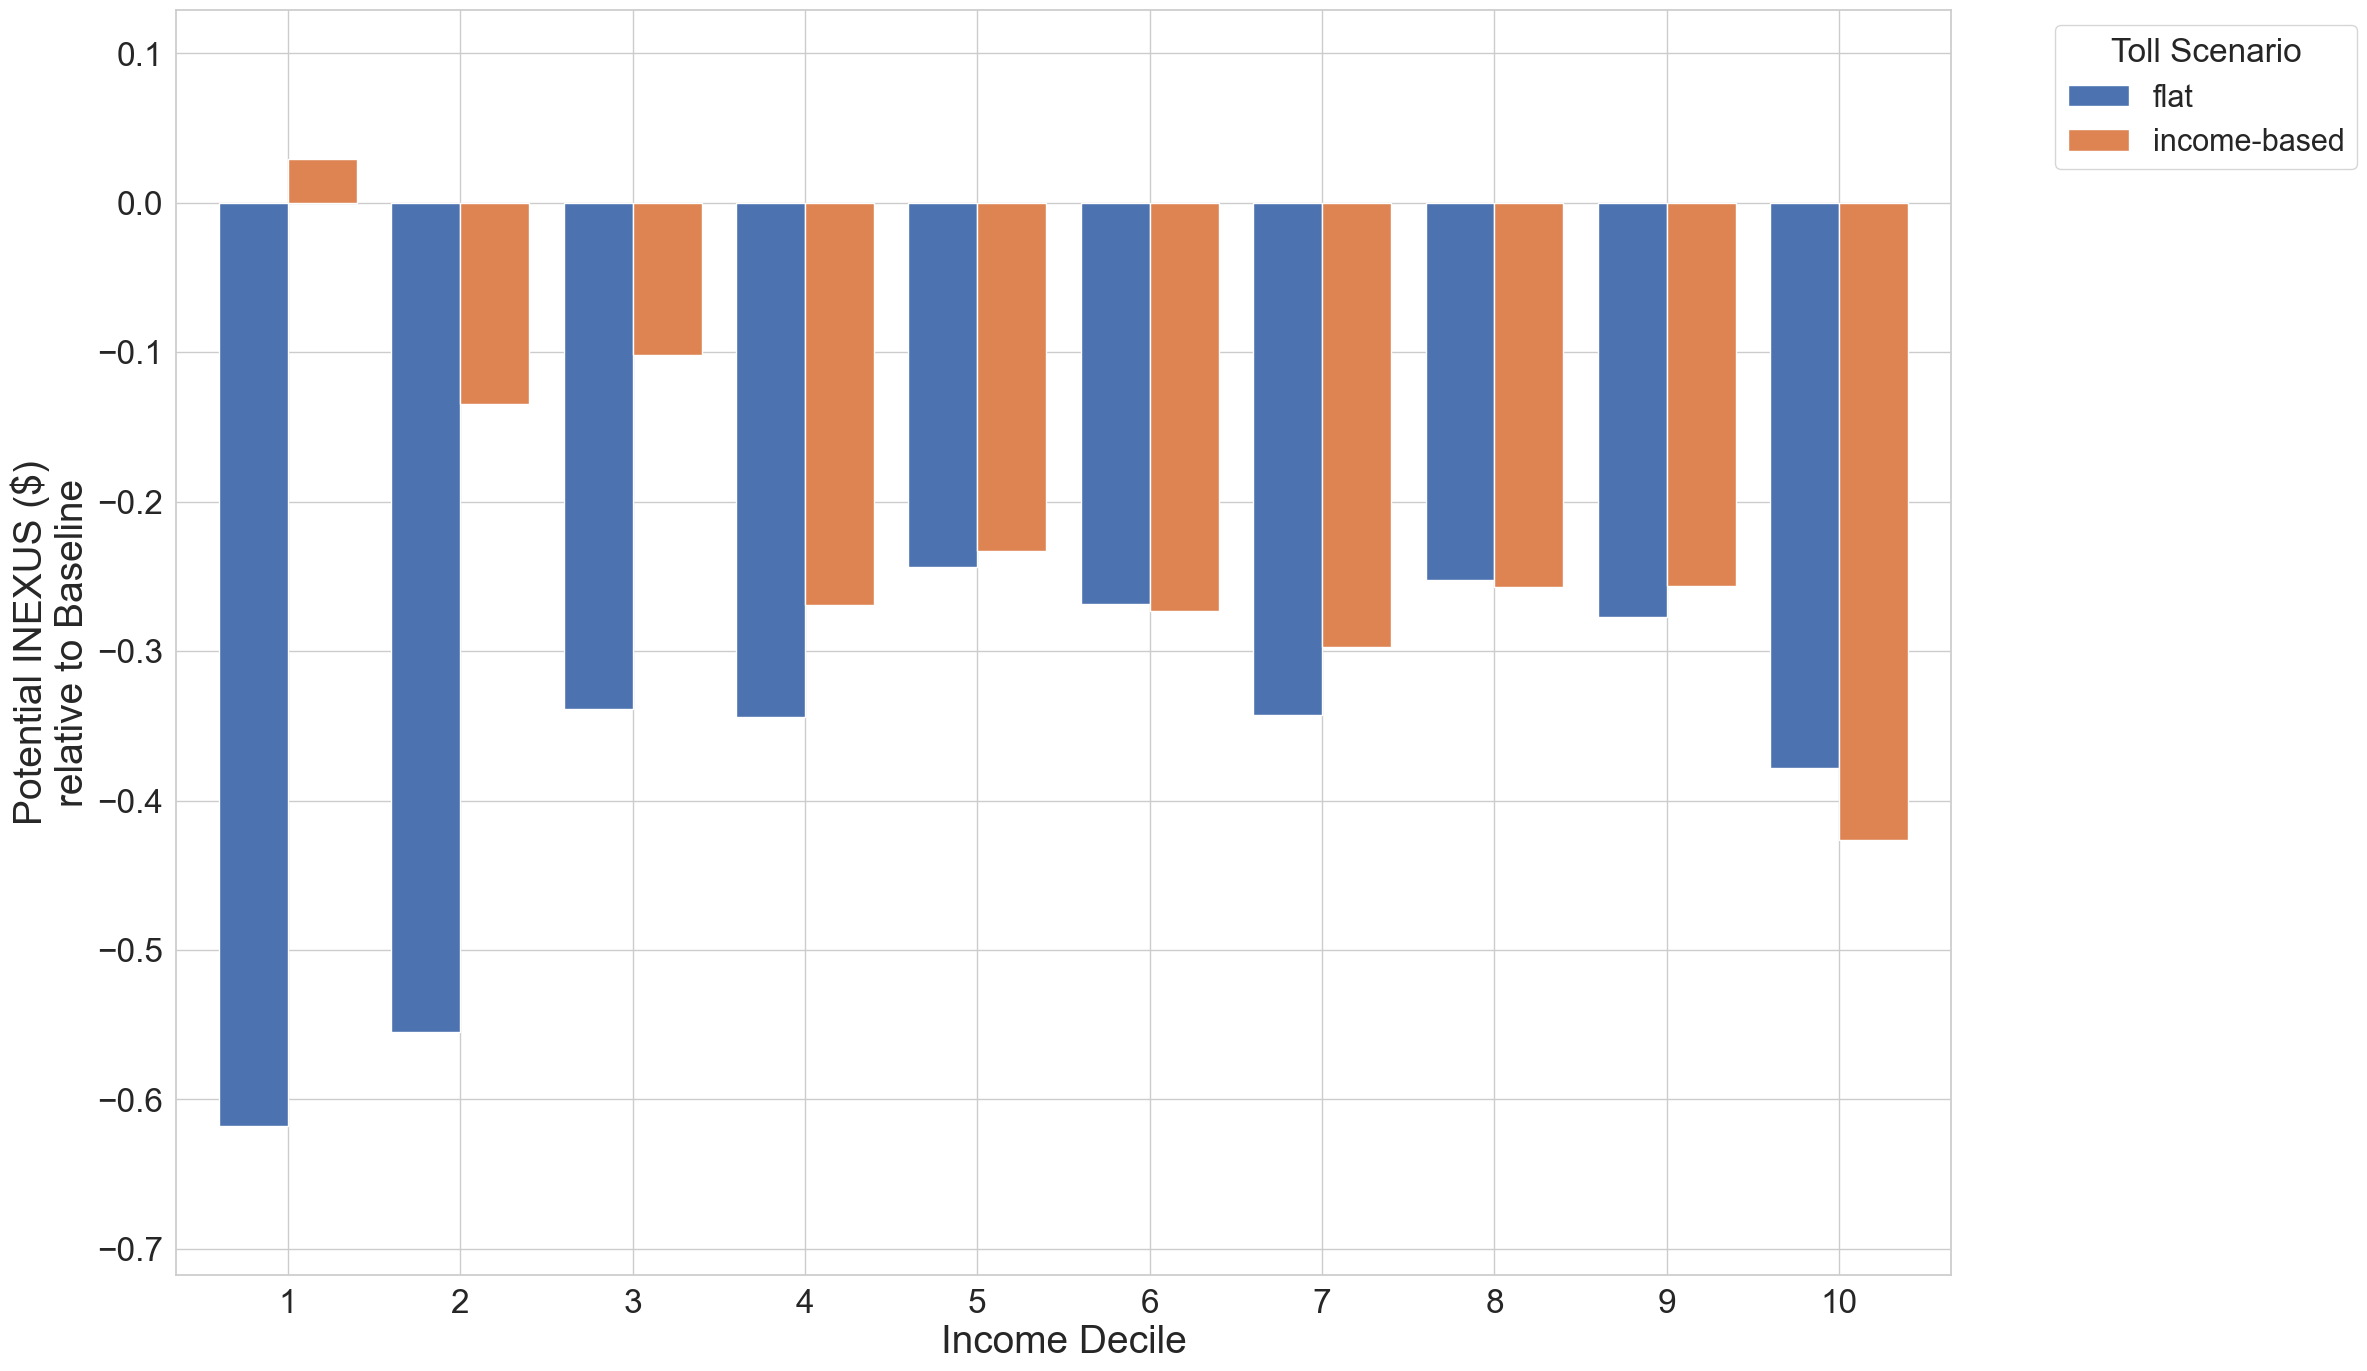

In [35]:
# 1) Convert incomeRank to integer percent
lorenz_data['incomeRank'] = (lorenz_data['incomeRank'] * 100).astype(int)

# 2) Pivot so each row is an incomeRank, each column is a toll scenario
plot_data = lorenz_data.pivot(
    index='incomeRank',
    columns='toll',
    values='potential_in_dollar_2023_relative_to_baseline'
)

# 3) Drop baseline if it exists
plot_data = plot_data.drop('Baseline (no toll)', axis=1, errors='ignore')

# 4) Plot all rows (could be 101 bars if ranks go 0..100, or more/less)
plt.figure(figsize=(24, 14))
sns.set_style("whitegrid")

ax = plot_data.plot(kind='bar', width=0.8, figsize=(24, 14))

# 5) Manually create 10 equally spaced tick positions from 0..(n-1)
n = len(plot_data)  # total number of bars
num_ticks = 10
tick_positions = np.linspace(0, n - 1, num_ticks).astype(int)  # 10 points across
tick_labels = [str(i + 1) for i in range(num_ticks)]           # label "1".."10"

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=24)

# 6) Label axes & legend
plt.xlabel('Income Decile', fontsize=28)
plt.ylabel('Potential INEXUS ($)\nrelative to Baseline', fontsize=28)
plt.yticks(fontsize=24)
plt.legend(
    title='Toll Scenario', title_fontsize=24, 
    fontsize=22, bbox_to_anchor=(1.05, 1), loc='upper left'
)

# 7) Adjust y-axis range slightly
y_min = plot_data.min().min()
y_max = plot_data.max().max()
plt.ylim(y_min - 0.1, y_max + 0.1)

plt.tight_layout()
plt.savefig('refined_grouped_bar_plot_lorenz_no_baseline.png', dpi=300, bbox_inches='tight')
plt.show()



In [36]:
lorenz_data_3 = process_income_barplot(df)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3641173865.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_stacked_rh_price['incomeInThousands'] = small_stacked_rh_price['income'] / 1000
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3641173865.py:25: FutureWarning: The provided callable <function mean at 0x106092680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  lorenz_data = pd.pivot_table(
/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_672/3641173865.py:25: FutureWarning: The provided callable <function mean at 0x106092680> is currently using SeriesGroupBy.mean. In

# Bar plot (by income category)

<Figure size 2400x1400 with 0 Axes>

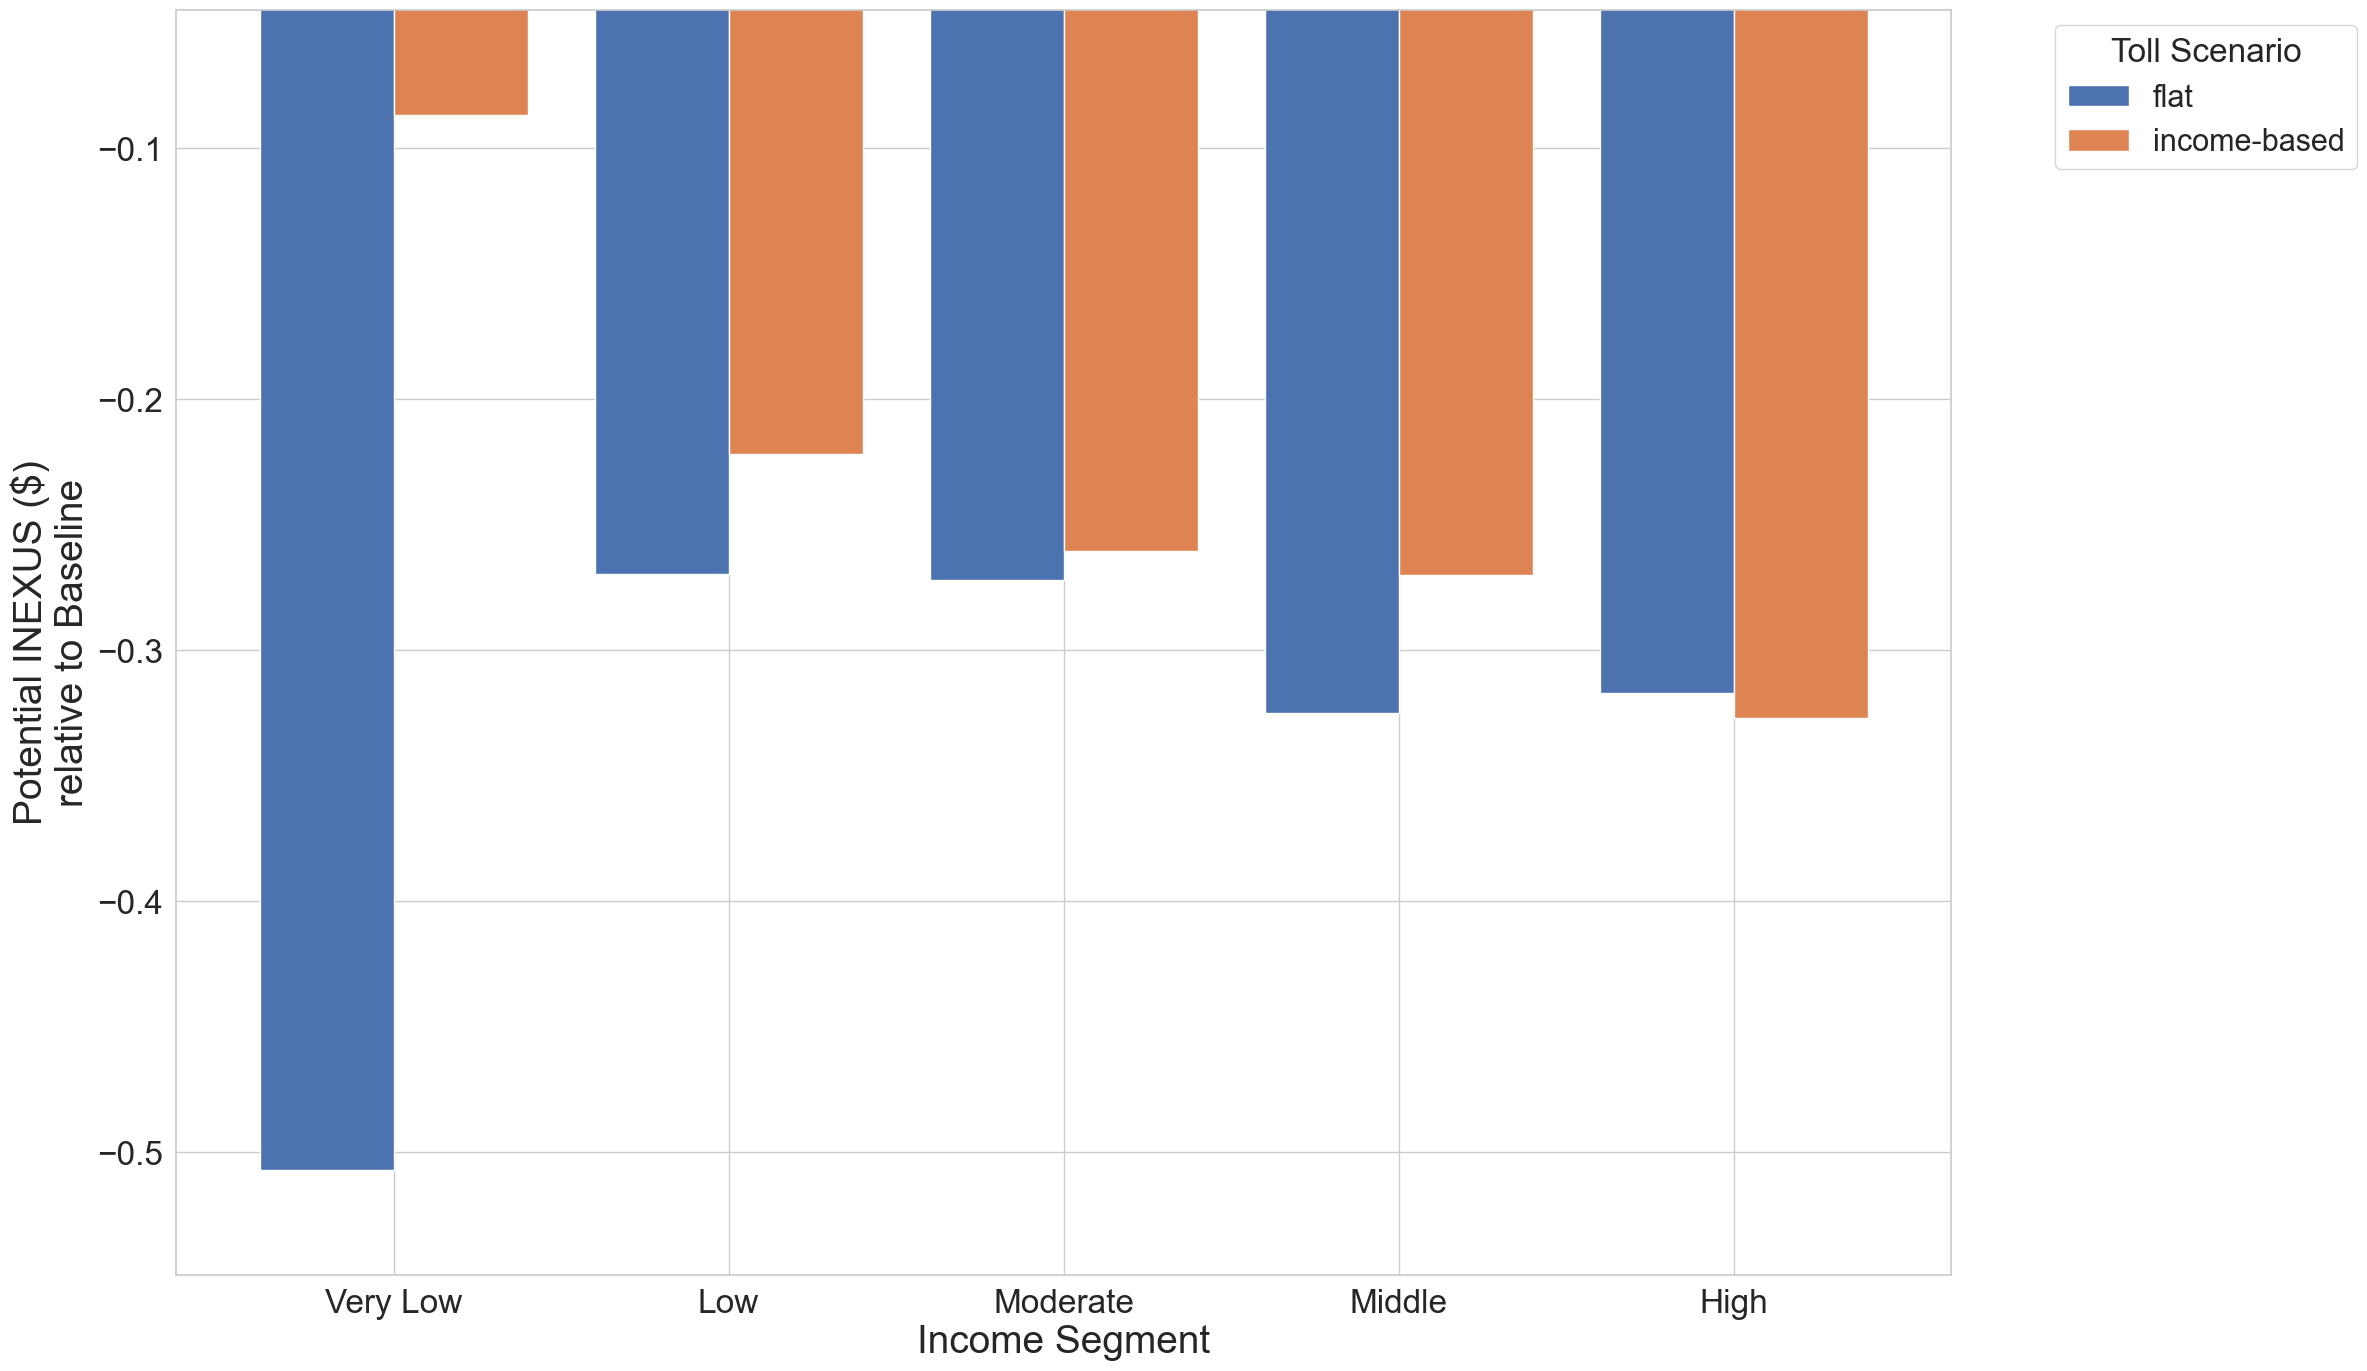

In [37]:
# Drop the 'Baseline (no toll)' scenario before pivoting
lorenz_data_3_no_baseline = lorenz_data_3[lorenz_data_3['toll'] != 'baseline']

# Define the correct order of income segments
income_segment_order = ['Very Low', 'Low', 'Moderate', 'Middle', 'High']

# Reshape the data for grouped bar plot
plot_data = lorenz_data_3_no_baseline.pivot(index='income_segment', columns='toll', values='potential_in_dollar_2023_relative_to_baseline')

# Reorder the index based on the defined income segment order
plot_data = plot_data.reindex(income_segment_order)

# Reverse only the 'flat' scenario
if 'flat' in plot_data.columns:
    plot_data['flat'] = plot_data['flat'].iloc[::-1]

# Set up the plot with a larger figure size
plt.figure(figsize=(24, 14))
sns.set_style("whitegrid")

# Create the grouped bar plot
ax = plot_data.plot(kind='bar', width=0.8, figsize=(24, 14))

# We have 5 income segments, so we create tick positions [0, 1, 2, 3, 4]
ax.set_xticks(range(len(plot_data.index)))  
# Make sure plot_data.index == ['Very Low', 'Low', 'Moderate', 'Middle', 'High']
ax.set_xticklabels(plot_data.index, rotation=0, fontsize=24)

plt.xlabel('Income Segment', fontsize=28)
plt.ylabel('Potential INEXUS ($)\nrelative to Baseline', fontsize=28)
plt.yticks(fontsize=24)
plt.legend(title='Toll Scenario', title_fontsize=24, fontsize=22, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust y-axis
y_min = plot_data.min().min()
y_max = plot_data.max().max()
plt.ylim(y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))

plt.tight_layout()
plt.show()

<Figure size 2400x1400 with 0 Axes>

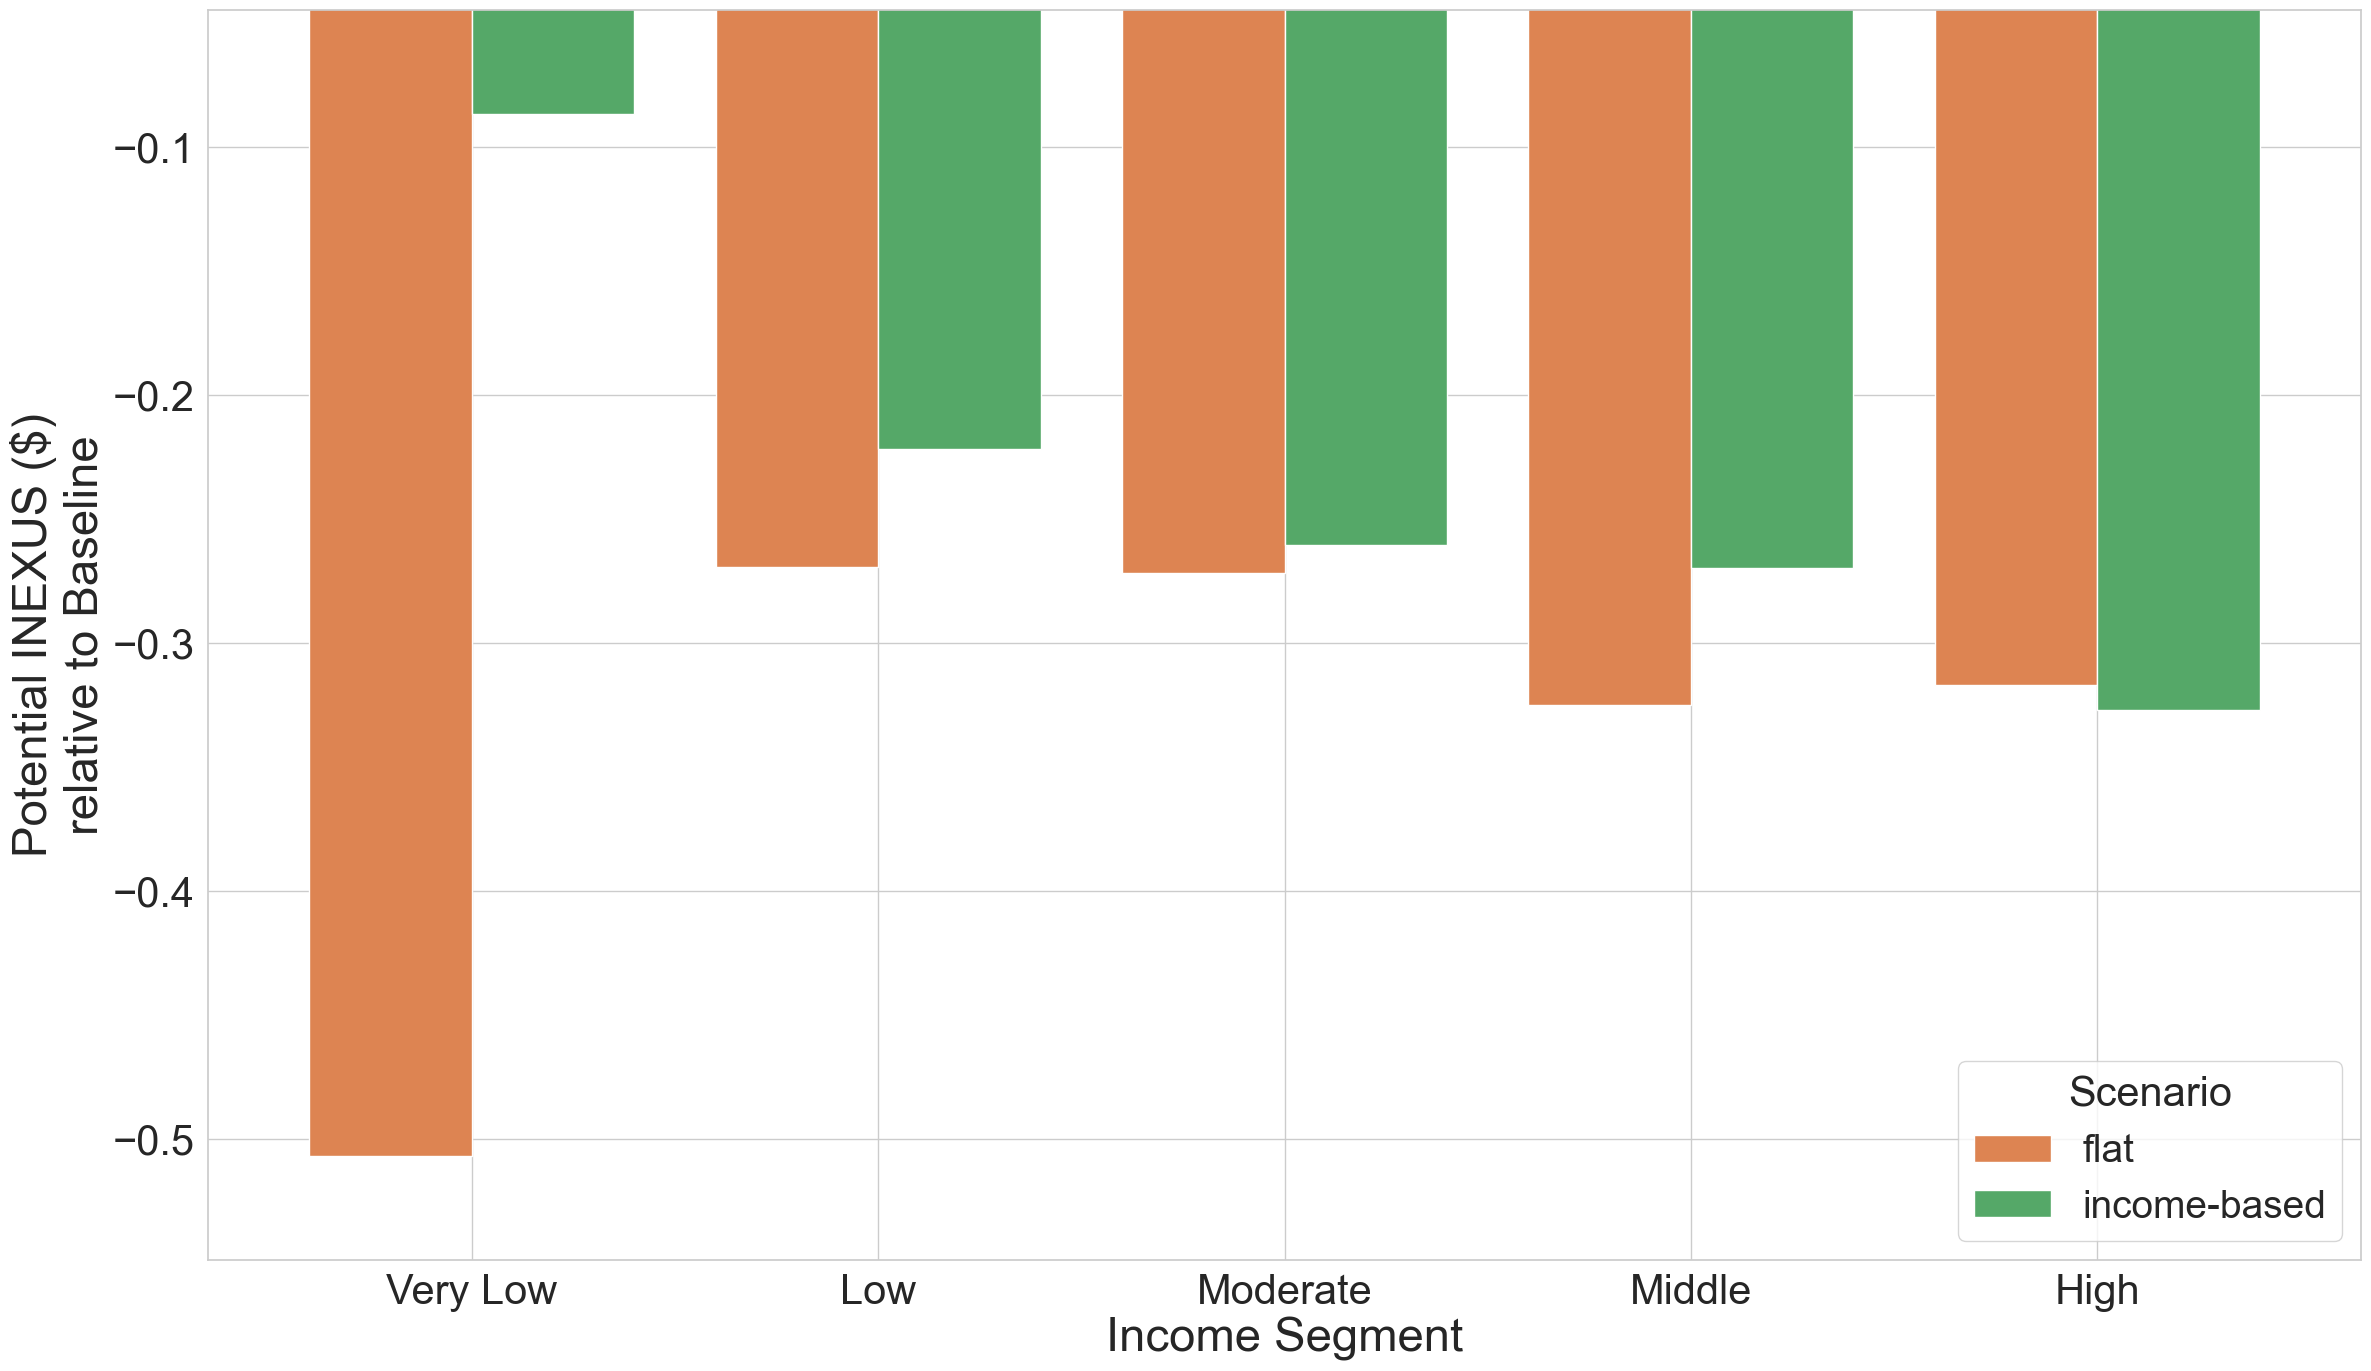

In [39]:
# Drop the 'Baseline (no toll)' scenario before pivoting
lorenz_data_3_no_baseline = lorenz_data_3[lorenz_data_3['toll'] != 'baseline']
# Define the correct order of income segments
income_segment_order = ['Very Low', 'Low', 'Moderate', 'Middle', 'High']
# Reshape the data for grouped bar plot
plot_data = lorenz_data_3_no_baseline.pivot(index='income_segment', columns='toll', values='potential_in_dollar_2023_relative_to_baseline')
# Reorder the index based on the defined income segment order
plot_data = plot_data.reindex(income_segment_order)
# Reverse only the 'flat' scenario
if 'flat' in plot_data.columns:
    plot_data['flat'] = plot_data['flat'].iloc[::-1]
# Set up the plot with a larger figure size
plt.figure(figsize=(24, 14))
sns.set_style("whitegrid")

# Get default color palette, then skip the first color (blue)
colors = sns.color_palette()[1:3]  # This gets orange and green

# Create the grouped bar plot with custom colors
ax = plot_data.plot(kind='bar', width=0.8, figsize=(24, 14), color=colors)
# We have 5 income segments, so we create tick positions [0, 1, 2, 3, 4]
ax.set_xticks(range(len(plot_data.index)))  
# Make sure plot_data.index == ['Very Low', 'Low', 'Moderate', 'Middle', 'High']
ax.set_xticklabels(plot_data.index, rotation=0, fontsize=30)  # Increased font size
plt.xlabel('Income Segment', fontsize=34)  # Increased font size
plt.ylabel('Potential INEXUS ($)\nrelative to Baseline', fontsize=34)  # Increased font size
plt.yticks(fontsize=30)  # Increased font size

# Put legend in bottom right corner
plt.legend(title='Scenario', title_fontsize=30, fontsize=28, loc='lower right')

# Adjust y-axis
y_min = plot_data.min().min()
y_max = plot_data.max().max()
plt.ylim(y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))
plt.tight_layout()
plt.show()

In [43]:
# Assuming your DataFrame (lorenz_data) contains:
# - 'toll': toll scenario (including a baseline scenario, e.g. "Baseline (no toll)")
# - 'income_segment': the income segment (e.g., 'Very Low', 'Low', etc.)
# - 'trip_count': the number of trips represented by the row
# - 'potential_in_dollar_2023_relative_to_baseline': per-trip INEXUS difference relative to baseline

# Step 1: Compute the total difference per row by multiplying the per-trip difference by the trip count.
lorenz_data_3['total_diff'] = (lorenz_data_3['potential_in_dollar_2023_relative_to_baseline'] *
                             lorenz_data_3['trip_count'])

# Step 2: Group by toll scenario and income segment and sum the total differences.
agg_diff = lorenz_data_3.groupby(['toll','income_segment'])['total_diff'].sum().reset_index()

# Step 3: Multiply the aggregated difference by 10 (sample) and 260 (number of weekdays)
agg_diff['aggregated_inexus'] = agg_diff['total_diff'] * 10 * 260

# (Optional) Remove the baseline scenario if it's not needed.
agg_diff = agg_diff[agg_diff['toll'] != 'Baseline (no toll)']

In [44]:
sum_by_toll = agg_diff.groupby(['toll','income_segment'])['aggregated_inexus'].sum()

In [45]:
formatted_sum_by_toll = sum_by_toll.apply(lambda x: f"${x:,.2f}")
print(formatted_sum_by_toll)

toll          income_segment
baseline      High                        $0.00
              Low                         $0.00
              Middle                      $0.00
              Moderate                    $0.00
              Very Low                    $0.00
flat          High              $-43,986,765.30
              Low               $-16,035,267.80
              Middle            $-10,279,007.14
              Moderate          $-22,995,489.69
              Very Low          $-70,187,341.79
income-based  High              $-45,436,144.42
              Low               $-13,632,630.47
              Middle             $-8,455,530.85
              Moderate          $-22,327,874.96
              Very Low          $-13,526,399.36
Name: aggregated_inexus, dtype: object


In [40]:

import pandas as pd

# Assuming your DataFrame (lorenz_data) contains:
# - 'toll': toll scenario (including a baseline scenario, e.g. "Baseline (no toll)")
# - 'income_segment': the income segment (e.g., 'Very Low', 'Low', etc.)
# - 'trip_count': the number of trips represented by the row
# - 'potential_in_dollar_2023_relative_to_baseline': per-trip INEXUS difference relative to baseline

# Step 1: Compute the total difference per row by multiplying the per-trip difference by the trip count.
lorenz_data_3['total_diff'] = (lorenz_data_3['potential_in_dollar_2023_relative_to_baseline'] *
                             lorenz_data_3['trip_count'])

# Step 2: Group by toll scenario and income segment and sum the total differences.
agg_diff = lorenz_data_3.groupby(['toll', 'income_segment'])['total_diff'].sum().reset_index()

# Step 3: Multiply the aggregated difference by 10 (sample) and 260 (number of weekdays)
agg_diff['aggregated_inexus'] = agg_diff['total_diff'] * 10 * 260

# (Optional) Remove the baseline scenario if it's not needed.
agg_diff = agg_diff[agg_diff['toll'] != 'Baseline (no toll)']

# The DataFrame 'agg_diff' now contains the total aggregated INEXUS difference (in dollars)
# for each toll scenario and income segment.
#print(agg_diff)



In [41]:
sum_by_toll = agg_diff.groupby('toll')['aggregated_inexus'].sum()

In [42]:
formatted_sum_by_toll = sum_by_toll.apply(lambda x: f"${x:,.2f}")
print(formatted_sum_by_toll)

toll
baseline                   $0.00
flat            $-163,483,871.72
income-based    $-103,378,580.06
Name: aggregated_inexus, dtype: object
